Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Haitham Alhad Hyder"
COLLABORATORS = ""

---

# CS110 Pre-class Work 9.1

## Part A. Average number of comparisons when searching

In [2]:
from pandas.core.common import flatten

## Binary Search Tree
##
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node

    def search_data(self, value):
        """searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise"""
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def to_string(self): 
        print('self.data', self.data)
        root=self
        if not root: 
            return 'Nil'
        else: 
            r = root.r_child.to_string() if root.r_child else 'Nil'
            l = root.l_child.to_string() if root.l_child else 'Nil'
        return 'Node(' + str(root.data) + ' L: ' + l + ' R: ' + r + ')'
    
    def search(self,value):
        if value == self.data:
            return self
        elif value < self.data and self.l_child:
            return self.l_child.search(value)
        elif value > self.data and self.r_child:
            return self.r_child.search(value)
        
        return None 

    def delete(self, value):
        self.remove_node(value, self.parent)
        return self

    def remove_node(self, value, parent):
        if value < self.data and self.l_child:
            return self.l_child.remove_node(value, self)
        elif value < self.data:
            return False
        elif value > self.data and self.r_child:
            return self.r_child.remove_node(value, self)
        elif value > self.data:
            return False
        else:
            if self.l_child is None and self.r_child is None and self == parent.l_child:
                parent.l_child = None
                self.clear_node()
            elif self.l_child is None and self.r_child is None and self == parent.r_child:
                parent.r_child = None
                self.clear_node()
            elif self.l_child and self.r_child is None and self == parent.l_child:
                parent.l_child = self.l_child
                self.clear_node()
            elif self.l_child and self.r_child is None and self == parent.r_child:
                parent.r_child = self.l_child
                self.clear_node()
            elif self.r_child and self.l_child is None and self == parent.l_child:
                parent.l_child = self.r_child
                self.clear_node()
            elif self.r_child and self.l_child is None and self == parent.r_child:
                parent.r_child = self.r_child
                self.clear_node()
            else:
                self.data = self.r_child.find_minimum_value()
                self.r_child.remove_node(self.data, self)

            return True

    def find_minimum_value(self):
        if self.l_child:
            return self.l_child.find_minimum_value()
        else:
            return self.data

    def clear_node(self):
        self.data = None
        self.l_child = None
        self.r_child = None


    def inorder(self):
        output = []
        if self.l_child:
            output.append(self.l_child.inorder())

        output.append(self.data)

        if self.r_child:
            output.append(self.r_child.inorder())

        return output

    def children(self):
        output = []  
        if self.l_child:
            output.append(self.l_child.children())   

        output.append(self)

        if self.r_child:
            output.append(self.r_child.children())

        return flatten(output)



## Question 1. 

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [3]:
def depth(root: Node, node: Node) -> int:
    """finds the depth of the node in a BST. depth of root is 0.

    Input:
    - root: a node, the root of the BST
    - node: a node to compute the depth of

    Output:
    - d: int, distance from node to root"""

    n: Node = node
    d: int = 0
    while n != root:
        d += 1
        n = n.parent

    return d

In [4]:
import math
# Testing code 
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
#         insert(bst, node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [5]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2.

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [6]:
def avg_cmp(bst: Node) -> float:
    """Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Input:
    - bst: a Node, the root of the BST
    
    Output:
    - n: float, average number of comparisons"""
    nodes = list(bst.children())

    total_depths: int = 0
    for node in nodes:
        total_depths += depth(bst, node) + 1
    
    return total_depths / len(nodes)

In [7]:
avg_cmp(bst)

2.7777777777777777

In [8]:
bst = Node(12)
bst.insert(Node(14))
assert(avg_cmp(bst) == 1.5)

In [9]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 
## Question 1. 

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [10]:
def max_depth(bst):
    """Finds the maximum depth of node in a BST.
    
    Input:
    - bst: a Node, the root of the BST
    
    Output:
    - h: int, the maximum depth in a BST"""
    nodes = list(bst.children())

    highest_depth: int = 0

    for node in nodes:
        current_depth = depth(bst, node)
        if current_depth > highest_depth:
            highest_depth = current_depth

    return highest_depth

In [11]:
lst = [8, 1, 7, 2, 6, 3, 5, 4]

bst = Node(lst[0])
for i in lst[1:]:
    bst.insert(Node(i))

max_depth(bst)

7

In [12]:
max_depth(bst)

7

In [13]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2. 

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [14]:
def avg_depth(bst):
    """Computes the average depth of a BST
    
    Input:
    - bst: a Node, root of the BST
    
    Output:
    - avg_d: float, average depth of the BST"""
    return avg_cmp(bst) - 1

In [15]:
avg_depth(bst)

3.5

In [16]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3.
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

In [17]:
import seaborn as sns
import numpy as np
import pandas as pd

def analyse_nodes(min_n: int = 10,
                    max_n: int = 1000,
                    step_n: int = 50,
                    reps: int = 10,
                ) -> tuple:
    
    average_depths = []
    maximum_depths = []
    n_s = list(range(min_n, max_n, step_n))

    total_avg_depths: float = 0.0
    total_max_depths: int = 0

    for n in n_s:
        lst = list(range(n))
        total_avg_depths: float = 0.0
        total_max_depths: int = 0
        for i in range(reps):
            np.random.shuffle(lst)
            bst = Node(lst[0])
            for i in lst[1:]:
                bst.insert(Node(i))
            total_avg_depths += avg_cmp(bst)
            total_max_depths += max_depth(bst)
        average_depths.append(total_avg_depths/reps)
        maximum_depths.append(total_max_depths/reps)

    return n_s, average_depths, maximum_depths


The values for both _average depths_ and _maximum depths_ are increasing as `n` increases.


## Question 4.

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [18]:
N, avg_depths, max_depths = analyse_nodes(max_n =1000, step_n = 5, reps=20)

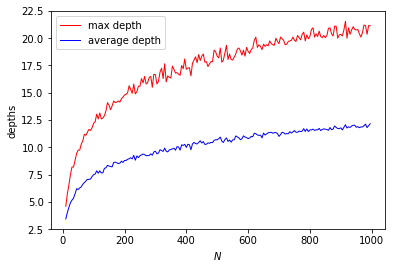

In [19]:
import matplotlib.pyplot as plt
plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'average depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()